In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
train_demo_df= pd.read_csv('data/traindemographics.csv')
train_demo_df.head()
test_demo_df= pd.read_csv('data/testdemographics.csv')
test_demo_df.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858f305c8dd672015c93b1db645db4,1976-08-28 00:00:00.000000,Savings,5.296628,7.593965,Heritage Bank,NaN,Permanent,NaN
1,8a858f085a477386015a47fb049e49ca,1978-06-23 00:00:00.000000,Savings,3.294513,6.596602,UBA,NaN,Permanent,NaN
2,8a858e6f5cd5e874015cd6f5634c39ad,1984-04-04 00:00:00.000000,Savings,8.501912,7.729364,First Bank,NaN,Permanent,NaN
3,8a858e9d5bfd7037015bfdab79f61305,1983-05-28 00:00:00.000000,Savings,3.318904,6.681595,UBA,NaN,Permanent,NaN
4,8a858fde56eb02280156eb6dafc128ac,1982-03-29 00:00:00.000000,Savings,6.354624,4.949031,First Bank,NaN,Self-Employed,NaN


In [16]:
train_perf_df= pd.read_csv('data/trainperf.csv')
train_perf_df.head()
test_perf_df= pd.read_csv('data/testperf.csv')
test_perf_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,NaN
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,NaN


In [17]:
trian_prevloans_df= pd.read_csv('data/trainprevloans.csv')
trian_prevloans_df.head()
test_prevloans_df= pd.read_csv('data/testprevloans.csv')
test_prevloans_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,NaN,2016-06-16 00:00:00.000000,2016-06-16 15:44:08.000000
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,NaN,2017-03-06 00:00:00.000000,2017-03-02 16:07:47.000000
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,NaN,2017-04-03 00:00:00.000000,2017-04-01 21:29:46.000000
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,2016-07-04 11:34:04.000000,NaN,2016-07-04 00:00:00.000000,2016-07-04 11:19:01.000000
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,2016-06-02 00:02:58.000000,NaN,2016-05-31 00:00:00.000000,2016-06-01 15:22:34.000000


In [25]:
train_df = pd.merge(train_perf_df, trian_prevloans_df["firstduedate"], left_index= True, right_index= True)
train_df = pd.merge(train_df, trian_prevloans_df["firstrepaiddate"], left_index= True, right_index= True)
train_df = pd.merge(train_df, trian_prevloans_df["closeddate"], left_index= True, right_index= True)
train_df = pd.merge(train_df, train_demo_df["birthdate"], left_index= True, right_index= True)
train_df = pd.merge(train_df, train_demo_df["longitude_gps"], left_index= True, right_index= True)
train_df = pd.merge(train_df, train_demo_df["latitude_gps"], left_index= True, right_index= True)
train_df = pd.merge(train_df, train_demo_df["bank_account_type"], left_index= True, right_index= True)
train_df = pd.merge(train_df, train_demo_df["employment_status_clients"], left_index= True, right_index= True)
train_df = pd.merge(train_df, train_demo_df["level_of_education_clients"], left_index= True, right_index= True)

train_df

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,firstduedate,firstrepaiddate,closeddate,birthdate,longitude_gps,latitude_gps,bank_account_type,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000,2016-09-01 16:06:48.000000,1973-10-10 00:00:00.000000,3.319219,6.528604,Savings,NaN,NaN
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000,2017-05-28 14:44:49.000000,1986-01-21 00:00:00.000000,3.325598,7.119403,Savings,Permanent,NaN
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000,2017-04-26 22:18:56.000000,1987-04-01 00:00:00.000000,5.746100,5.563174,Savings,NaN,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000,2017-04-24 01:35:52.000000,1991-07-19 00:00:00.000000,3.362850,6.642485,Savings,Permanent,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000,2017-07-14 21:18:43.000000,1982-11-22 00:00:00.000000,8.455332,11.971410,Savings,Permanent,NaN
5,8a8589f35451855401546b0738c42524,301986516,8,2017-07-19 21:46:24.000000,2017-07-19 20:46:18.000000,30000.0,39000.0,60,NaN,Good,2017-04-05 00:00:00.000000,2017-04-04 15:31:47.000000,2017-04-04 15:46:56.000000,1978-12-11 00:00:00.000000,3.330087,6.552518,Savings,Permanent,NaN
6,8a858e095c59b91b015c5e5cea3719bc,301972027,3,2017-07-10 19:25:33.000000,2017-07-10 18:25:28.000000,10000.0,13000.0,30,NaN,Good,2017-07-04 00:00:00.000000,2017-07-03 23:25:29.000000,2017-07-03 23:35:38.000000,1990-07-21 00:00:00.000000,3.365935,6.564823,Savings,Permanent,NaN
7,8a858e1158dc4d830158f7bde4f47ea7,301994428,10,2017-07-24 23:42:27.000000,2017-07-24 22:42:21.000000,30000.0,34500.0,30,NaN,Good,2017-06-19 00:00:00.000000,2017-06-19 10:00:21.000000,2017-06-19 10:10:35.000000,1986-09-09 00:00:00.000000,4.734382,7.606868,Savings,Permanent,NaN
8,8a858e185b4923b4015b4ae48d28646a,301996687,4,2017-07-26 10:53:05.000000,2017-07-26 09:52:57.000000,10000.0,11500.0,15,NaN,Good,2017-07-13 00:00:00.000000,2017-07-10 13:21:53.000000,2017-07-10 13:32:03.000000,1992-11-17 00:00:00.000000,3.290590,6.612075,Savings,Permanent,NaN
9,8a858e1d5cd58f9e015ceda4bdb63673,301981931,2,2017-07-17 13:48:42.000000,2017-07-17 12:48:35.000000,10000.0,11500.0,15,NaN,Good,2017-02-21 00:00:00.000000,2017-02-21 05:19:09.000000,2017-02-21 05:34:20.000000,1965-02-23 00:00:00.000000,3.362783,6.509418,Savings,Permanent,NaN


In [26]:
test_df = pd.merge(test_perf_df, trian_prevloans_df["firstduedate"], left_index= True, right_index= True)
test_df = pd.merge(test_df, trian_prevloans_df["firstrepaiddate"], left_index= True, right_index= True)
test_df = pd.merge(test_df, trian_prevloans_df["closeddate"], left_index= True, right_index= True)
test_df = pd.merge(test_df, test_demo_df["birthdate"], left_index= True, right_index= True)
test_df = pd.merge(test_df, test_demo_df["longitude_gps"], left_index= True, right_index= True)
test_df = pd.merge(test_df, test_demo_df["latitude_gps"], left_index= True, right_index= True)
test_df = pd.merge(test_df, test_demo_df["bank_account_type"], left_index= True, right_index= True)
test_df = pd.merge(test_df, test_demo_df["employment_status_clients"], left_index= True, right_index= True)
test_df = pd.merge(test_df, test_demo_df["level_of_education_clients"], left_index= True, right_index= True)

test_df

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,firstduedate,firstrepaiddate,closeddate,birthdate,longitude_gps,latitude_gps,bank_account_type,employment_status_clients,level_of_education_clients
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000,2016-09-01 16:06:48.000000,1976-08-28 00:00:00.000000,5.296628,7.593965,Savings,Permanent,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000,2017-05-28 14:44:49.000000,1978-06-23 00:00:00.000000,3.294513,6.596602,Savings,Permanent,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000,2017-04-26 22:18:56.000000,1984-04-04 00:00:00.000000,8.501912,7.729364,Savings,Permanent,NaN
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000,2017-04-24 01:35:52.000000,1983-05-28 00:00:00.000000,3.318904,6.681595,Savings,Permanent,NaN
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000,2017-07-14 21:18:43.000000,1982-03-29 00:00:00.000000,6.354624,4.949031,Savings,Self-Employed,NaN
5,8a858e42570314e001570584d48641dc,301962275,9,18:16.0,18:10.0,30000,34500.0,30,NaN,2017-04-05 00:00:00.000000,2017-04-04 15:31:47.000000,2017-04-04 15:46:56.000000,1988-11-19 00:00:00.000000,3.307558,7.112214,Other,Self-Employed,Post-Graduate
6,8a858e675c3fe0a1015c44ba8a037fee,301987980,2,14:28.0,14:20.0,10000,11500.0,15,NaN,2017-07-04 00:00:00.000000,2017-07-03 23:25:29.000000,2017-07-03 23:35:38.000000,1986-05-27 00:00:00.000000,8.349746,4.964838,Savings,Permanent,NaN
7,8a858e705668e16701568d358c6579da,301965939,8,01:35.0,01:29.0,10000,11500.0,15,NaN,2017-06-19 00:00:00.000000,2017-06-19 10:00:21.000000,2017-06-19 10:10:35.000000,1978-06-11 00:00:00.000000,3.892932,7.408140,Savings,NaN,NaN
8,8a858e945bb0014b015bb526a9584a2d,301974975,3,42:52.0,42:46.0,20000,24500.0,30,NaN,2017-07-13 00:00:00.000000,2017-07-10 13:21:53.000000,2017-07-10 13:32:03.000000,1982-02-06 00:00:00.000000,3.432870,6.837874,Savings,NaN,NaN
9,8a858eba5b681df4015b7c3d810c05ff,301974345,5,43:53.0,43:44.0,30000,34500.0,30,8a858e885b68546c015b738e5bc34366,2017-02-21 00:00:00.000000,2017-02-21 05:19:09.000000,2017-02-21 05:34:20.000000,1991-02-09 00:00:00.000000,7.527908,6.427476,Savings,Permanent,NaN


In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4346 entries, 0 to 4345
Data columns (total 19 columns):
customerid                    4346 non-null object
systemloanid                  4346 non-null int64
loannumber                    4346 non-null int64
approveddate                  4346 non-null object
creationdate                  4346 non-null object
loanamount                    4346 non-null float64
totaldue                      4346 non-null float64
termdays                      4346 non-null int64
referredby                    584 non-null object
good_bad_flag                 4346 non-null object
firstduedate                  4346 non-null object
firstrepaiddate               4346 non-null object
closeddate                    4346 non-null object
birthdate                     4346 non-null object
longitude_gps                 4346 non-null float64
latitude_gps                  4346 non-null float64
bank_account_type             4346 non-null object
employment_status_clients 

In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1449
Data columns (total 18 columns):
customerid                    1450 non-null object
systemloanid                  1450 non-null int64
loannumber                    1450 non-null int64
approveddate                  1450 non-null object
creationdate                  1450 non-null object
loanamount                    1450 non-null int64
totaldue                      1450 non-null float64
termdays                      1450 non-null int64
referredby                    184 non-null object
firstduedate                  1450 non-null object
firstrepaiddate               1450 non-null object
closeddate                    1450 non-null object
birthdate                     1450 non-null object
longitude_gps                 1450 non-null float64
latitude_gps                  1450 non-null float64
bank_account_type             1450 non-null object
employment_status_clients     1239 non-null object
level_of_education_clients  

In [29]:
train_df.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
count,4.346000e+03,4346.000000,4346.000000,4346.000000,4346.000000,4346.000000,4346.000000
mean,3.019810e+08,5.169581,17801.426599,21250.540888,29.271744,4.626189,7.251356
std,1.342529e+04,3.650181,10745.166507,11941.240232,11.533411,7.184832,3.055052
min,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000,-118.247009,-33.868818
25%,3.019692e+08,2.000000,10000.000000,13000.000000,30.000000,3.354953,6.470610
50%,3.019801e+08,4.000000,10000.000000,13000.000000,30.000000,3.593302,6.621888
75%,3.019935e+08,7.000000,20000.000000,24500.000000,30.000000,6.545220,7.425052
max,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000,151.209290,71.228069


In [30]:
test_df.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
count,1.450000e+03,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,3.019807e+08,5.088966,17482.758621,20874.664069,28.810345,4.485600,7.118636
std,1.339572e+04,3.665210,10585.420034,11726.584630,11.074839,6.058934,2.918113
min,3.019585e+08,2.000000,10000.000000,10500.000000,15.000000,-149.033700,-74.005974
25%,3.019687e+08,2.000000,10000.000000,13000.000000,30.000000,3.354858,6.481300
50%,3.019799e+08,4.000000,10000.000000,13000.000000,30.000000,3.580392,6.619610
75%,3.019929e+08,7.000000,20000.000000,24500.000000,30.000000,6.631921,7.432615
max,3.020040e+08,34.000000,60000.000000,68100.000000,90.000000,39.815590,40.665105


Text(0.5, 1.0, 'Correlation of the ')

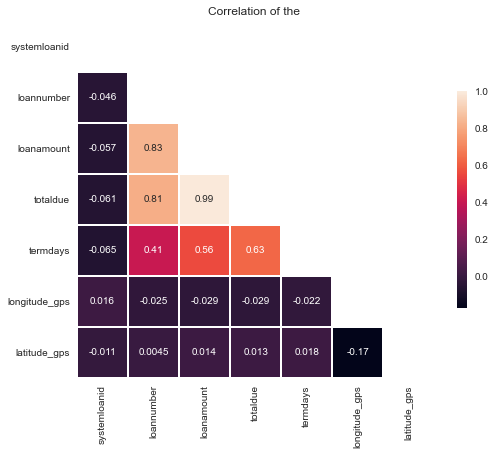

In [31]:
import pandas as pd
import yellowbrick #Yellowbrick is the visualization library built from scikit-learn and matplotlib
import matplotlib.pyplot as plt # for plots
import seaborn as sns
import numpy as np
%matplotlib inline

# calculate correlation matrix
corr = train_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# plot correlation matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, mask=mask, square=True, linewidths=.5, annot=True, 
            cbar_kws={"shrink": .5})
ax.set_title('Correlation of the ')

### Null check

In [42]:
train_df.isnull().sum()

customerid                    0
systemloanid                  0
loannumber                    0
approveddate                  0
creationdate                  0
loanamount                    0
totaldue                      0
termdays                      0
good_bad_flag                 0
firstduedate                  0
firstrepaiddate               0
closeddate                    0
birthdate                     0
longitude_gps                 0
latitude_gps                  0
bank_account_type             0
employment_status_clients     0
level_of_education_clients    0
dtype: int64

In [43]:
train_df=train_df.drop(["referredby"], axis=1)

KeyError: "['referredby'] not found in axis"

In [44]:
test_df.isnull().sum()

customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
referredby                    1266
firstduedate                     0
firstrepaiddate                  0
closeddate                       0
birthdate                        0
longitude_gps                    0
latitude_gps                     0
bank_account_type                0
employment_status_clients      211
level_of_education_clients    1249
dtype: int64

In [45]:
train_df["employment_status_clients"]= train_df["employment_status_clients"].fillna("Permanent", axis= 0)
train_df["level_of_education_clients"]= train_df["level_of_education_clients"].fillna("Graduate", axis=0)

In [46]:
train_df.employment_status_clients.value_counts()

Permanent        3794
Self-Employed     348
Student           142
Unemployed         57
Retired             4
Contract            1
Name: employment_status_clients, dtype: int64

In [47]:
test_df["employment_status_clients"] = test_df["employment_status_clients"].fillna("Permanent", axis= 0)
test_df["level_of_education_clients"] = test_df["level_of_education_clients"].fillna("Graduate", axis= 0)


In [48]:
test_df.employment_status_clients.value_counts()

Permanent        1257
Self-Employed     119
Student            47
Unemployed         22
Retired             4
Contract            1
Name: employment_status_clients, dtype: int64

In [50]:
bct_index= train_df.groupby("bank_account_type").sum().reset_index()
bct_index


,bank_account_type,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
0,Current,16910840245,278,895000.0,1062125.0,1515,270.662593,397.105742
1,Other,261213343965,4421,15400000.0,18338813.0,24975,4057.112313,6186.697267
2,Savings,1034285107908,17768,61070000.0,72953912.7,100725,15777.641015,24930.588750


### Date conversion

In [51]:
train_df["birthdate"]= pd.to_datetime(train_df["birthdate"])
train_df["approveddate"]= pd.to_datetime(train_df["approveddate"])
train_df["creationdate"]= pd.to_datetime(train_df["creationdate"])
train_df["firstduedate"]= pd.to_datetime(train_df["firstduedate"])
train_df["firstrepaiddate"]= pd.to_datetime(train_df["firstrepaiddate"])
train_df["closeddate"]= pd.to_datetime(train_df["firstrepaiddate"])


In [55]:
test_df["birthdate"]= pd.to_datetime(test_df["birthdate"])
test_df["creationdate"]= pd.to_datetime(test_df["creationdate"])
test_df["firstduedate"]= pd.to_datetime(test_df["firstduedate"])
test_df["firstrepaiddate"]= pd.to_datetime(test_df["firstrepaiddate"])
test_df["closeddate"]= pd.to_datetime(test_df["firstrepaiddate"])

ValueError: hour must be in 0..23

In [65]:
test_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,firstduedate,firstrepaiddate,closeddate,birthdate,longitude_gps,latitude_gps,bank_account_type,employment_status_clients,level_of_education_clients
0,42,301998974,4,801,773,10000,12250.0,30,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000,2016-09-01 16:06:48.000000,1976-08-28,5.296628,7.593965,Savings,Permanent,Graduate
1,100,301963615,10,865,837,40000,44000.0,30,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000,2017-05-28 14:44:49.000000,1978-06-23,3.294513,6.596602,Savings,Permanent,Graduate
2,136,301982236,6,307,309,20000,24500.0,30,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000,2017-04-26 22:18:56.000000,1984-04-04,8.501912,7.729364,Savings,Permanent,Graduate
3,173,301971730,8,19,14,30000,34500.0,30,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000,2017-04-24 01:35:52.000000,1983-05-28,3.318904,6.681595,Savings,Permanent,Graduate
4,249,301959177,4,98,89,20000,24500.0,30,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000,2017-07-14 21:18:43.000000,1982-03-29,6.354624,4.949031,Savings,Self-Employed,Graduate


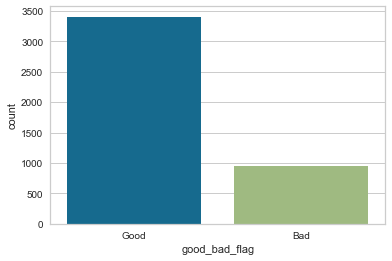

In [58]:
sns.countplot(x= "good_bad_flag", data= train_df)
plt.show()


In [66]:
test_df.describe()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,longitude_gps,latitude_gps
count,1450.000000,1.450000e+03,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,724.500000,3.019807e+08,5.088966,584.185517,589.033793,17482.758621,20874.664069,28.810345,4.485600,7.118636
std,418.723258,1.339572e+04,3.665210,342.943053,343.155381,10585.420034,11726.584630,11.074839,6.058934,2.918113
min,0.000000,3.019585e+08,2.000000,0.000000,0.000000,10000.000000,10500.000000,15.000000,-149.033700,-74.005974
25%,362.250000,3.019687e+08,2.000000,285.250000,291.250000,10000.000000,13000.000000,30.000000,3.354858,6.481300
50%,724.500000,3.019799e+08,4.000000,576.000000,587.500000,10000.000000,13000.000000,30.000000,3.580392,6.619610
75%,1086.750000,3.019929e+08,7.000000,883.750000,885.750000,20000.000000,24500.000000,30.000000,6.631921,7.432615
max,1449.000000,3.020040e+08,34.000000,1178.000000,1185.000000,60000.000000,68100.000000,90.000000,39.815590,40.665105


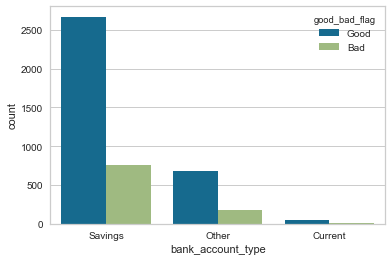

In [59]:
sns.countplot(x= "bank_account_type",hue= "good_bad_flag", data= train_df)
plt.show()


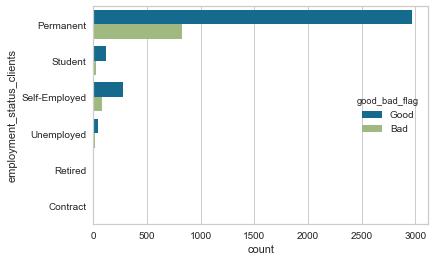

In [60]:
sns.countplot(y= "employment_status_clients", hue= "good_bad_flag", data= train_df)
plt.show()

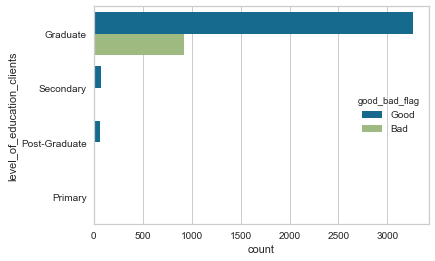

In [61]:
sns.countplot(y= "level_of_education_clients", hue= "good_bad_flag", data= train_df)
plt.show()


Good    77.961235
Bad     22.038765
Name: good_bad_flag, dtype: float64


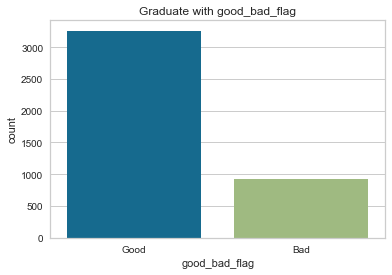

In [62]:
lec_grad= train_df[train_df["level_of_education_clients"]== "Graduate"]["good_bad_flag"]
print(lec_grad.value_counts(normalize= True)* 100)
sns.countplot(lec_grad)
plt.title("Graduate with good_bad_flag")
plt.show()

In [63]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over each column and do the conversion
for col in train_df.columns:
    # Compare if the dtype is object
    if train_df[col].dtype=='object':
    # Use LabelEncoder to convert to numeric
        train_df[col]=le.fit_transform(train_df[col])

In [64]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over each column and do the conversion
for col in test_df.columns:
    # Compare if the dtype is object
    if test_df[col].dtype=='object':
    # Use LabelEncoder to convert to numeric
        test_df[col]=le.fit_transform(test_df[col])

TypeError: argument must be a string or number

NameError: name 'train_df' is not defined